In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
drive.mount ('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [309]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


In [310]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [311]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


**Segmentación del Dataframe en 2 subconjuntos en función del Sexo**

En los primeros juegos, celebrados en Atenas en 1896, las mujeres estaban totalmente ausentes y, en los siguientes, en 1900, su representación sería el 2% del total de los atletas, participando de aquellas disciplinas que eran consideradas acordes a la naturaleza femenina, como golf y tenis.

En la antigüedad, el deporte serviría para reforzar la división sexual del trabajo y que ésta se entienda como el estado natural de las cosas 
Tomó más de 100 años (114 para ser exactos) para que la participación fuera "casi" igualitaria: los Juegos de Londres de 2012 se llamarían los “Juegos de las Mujeres” por el récord de participación femenina y por haber sido la primera vez que las mujeres compitieron en todas las categorías. 

Fuente: http://www.juegosolimpicosygenero.com/

Dada esta diferencia en la participación histórica se ha segmentado el análisis en fucnión del género de los ateltas.


In [312]:
df_atletas.shape

(271116, 15)

In [313]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

**MUJERES EN LOS JUEGOS OLÍMPICOS**

In [314]:
df_M.shape

(74522, 15)

In [315]:
df_M.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [317]:
print(df_M.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74098 non-null  float64
 4   Height  67378 non-null  float64
 5   Weight  66771 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB
None


Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

Limpieza de datos. 

En la columna "Medal" se reemplazan los valores NA con "sin medalla"

In [318]:
x = df_M["Medal"]

df_M["Medal"].fillna('sin medalla', inplace = True)

df_M["Medal"].replace([0], 'sin medalla')

4         sin medalla
5         sin medalla
6         sin medalla
7         sin medalla
8         sin medalla
             ...     
271080         Bronze
271099    sin medalla
271102         Bronze
271103         Silver
271110    sin medalla
Name: Medal, Length: 74522, dtype: object

 Completamos los valores nulos de "Age", "Height" y "Weight" con los promedios.

In [319]:
x = df_M["Age"].mean()
df_M["Age"].fillna(x, inplace = True) #edad

x = df_M["Height"].mean()
df_M["Height"].fillna(x, inplace = True) #altura

x = df_M["Weight"].mean()
df_M["Weight"].fillna(x, inplace = True) #peso

In [320]:
df_M

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


**1- Análisis de Medallas**

Visualizamos la proporción de cada color de medalla

In [321]:
Medallas_por_Color=df_M[['Medal','ID']].groupby(by='Medal').count()
Medallas_por_Color

,ID
Medal,
Bronze,3771
Gold,3747
Silver,3735
sin medalla,63269


In [322]:
Medallas_por_Color.index

Index(['Bronze', 'Gold', 'Silver', 'sin medalla'], dtype='object', name='Medal')

Text(0.5, 1.0, 'Medallas por color')

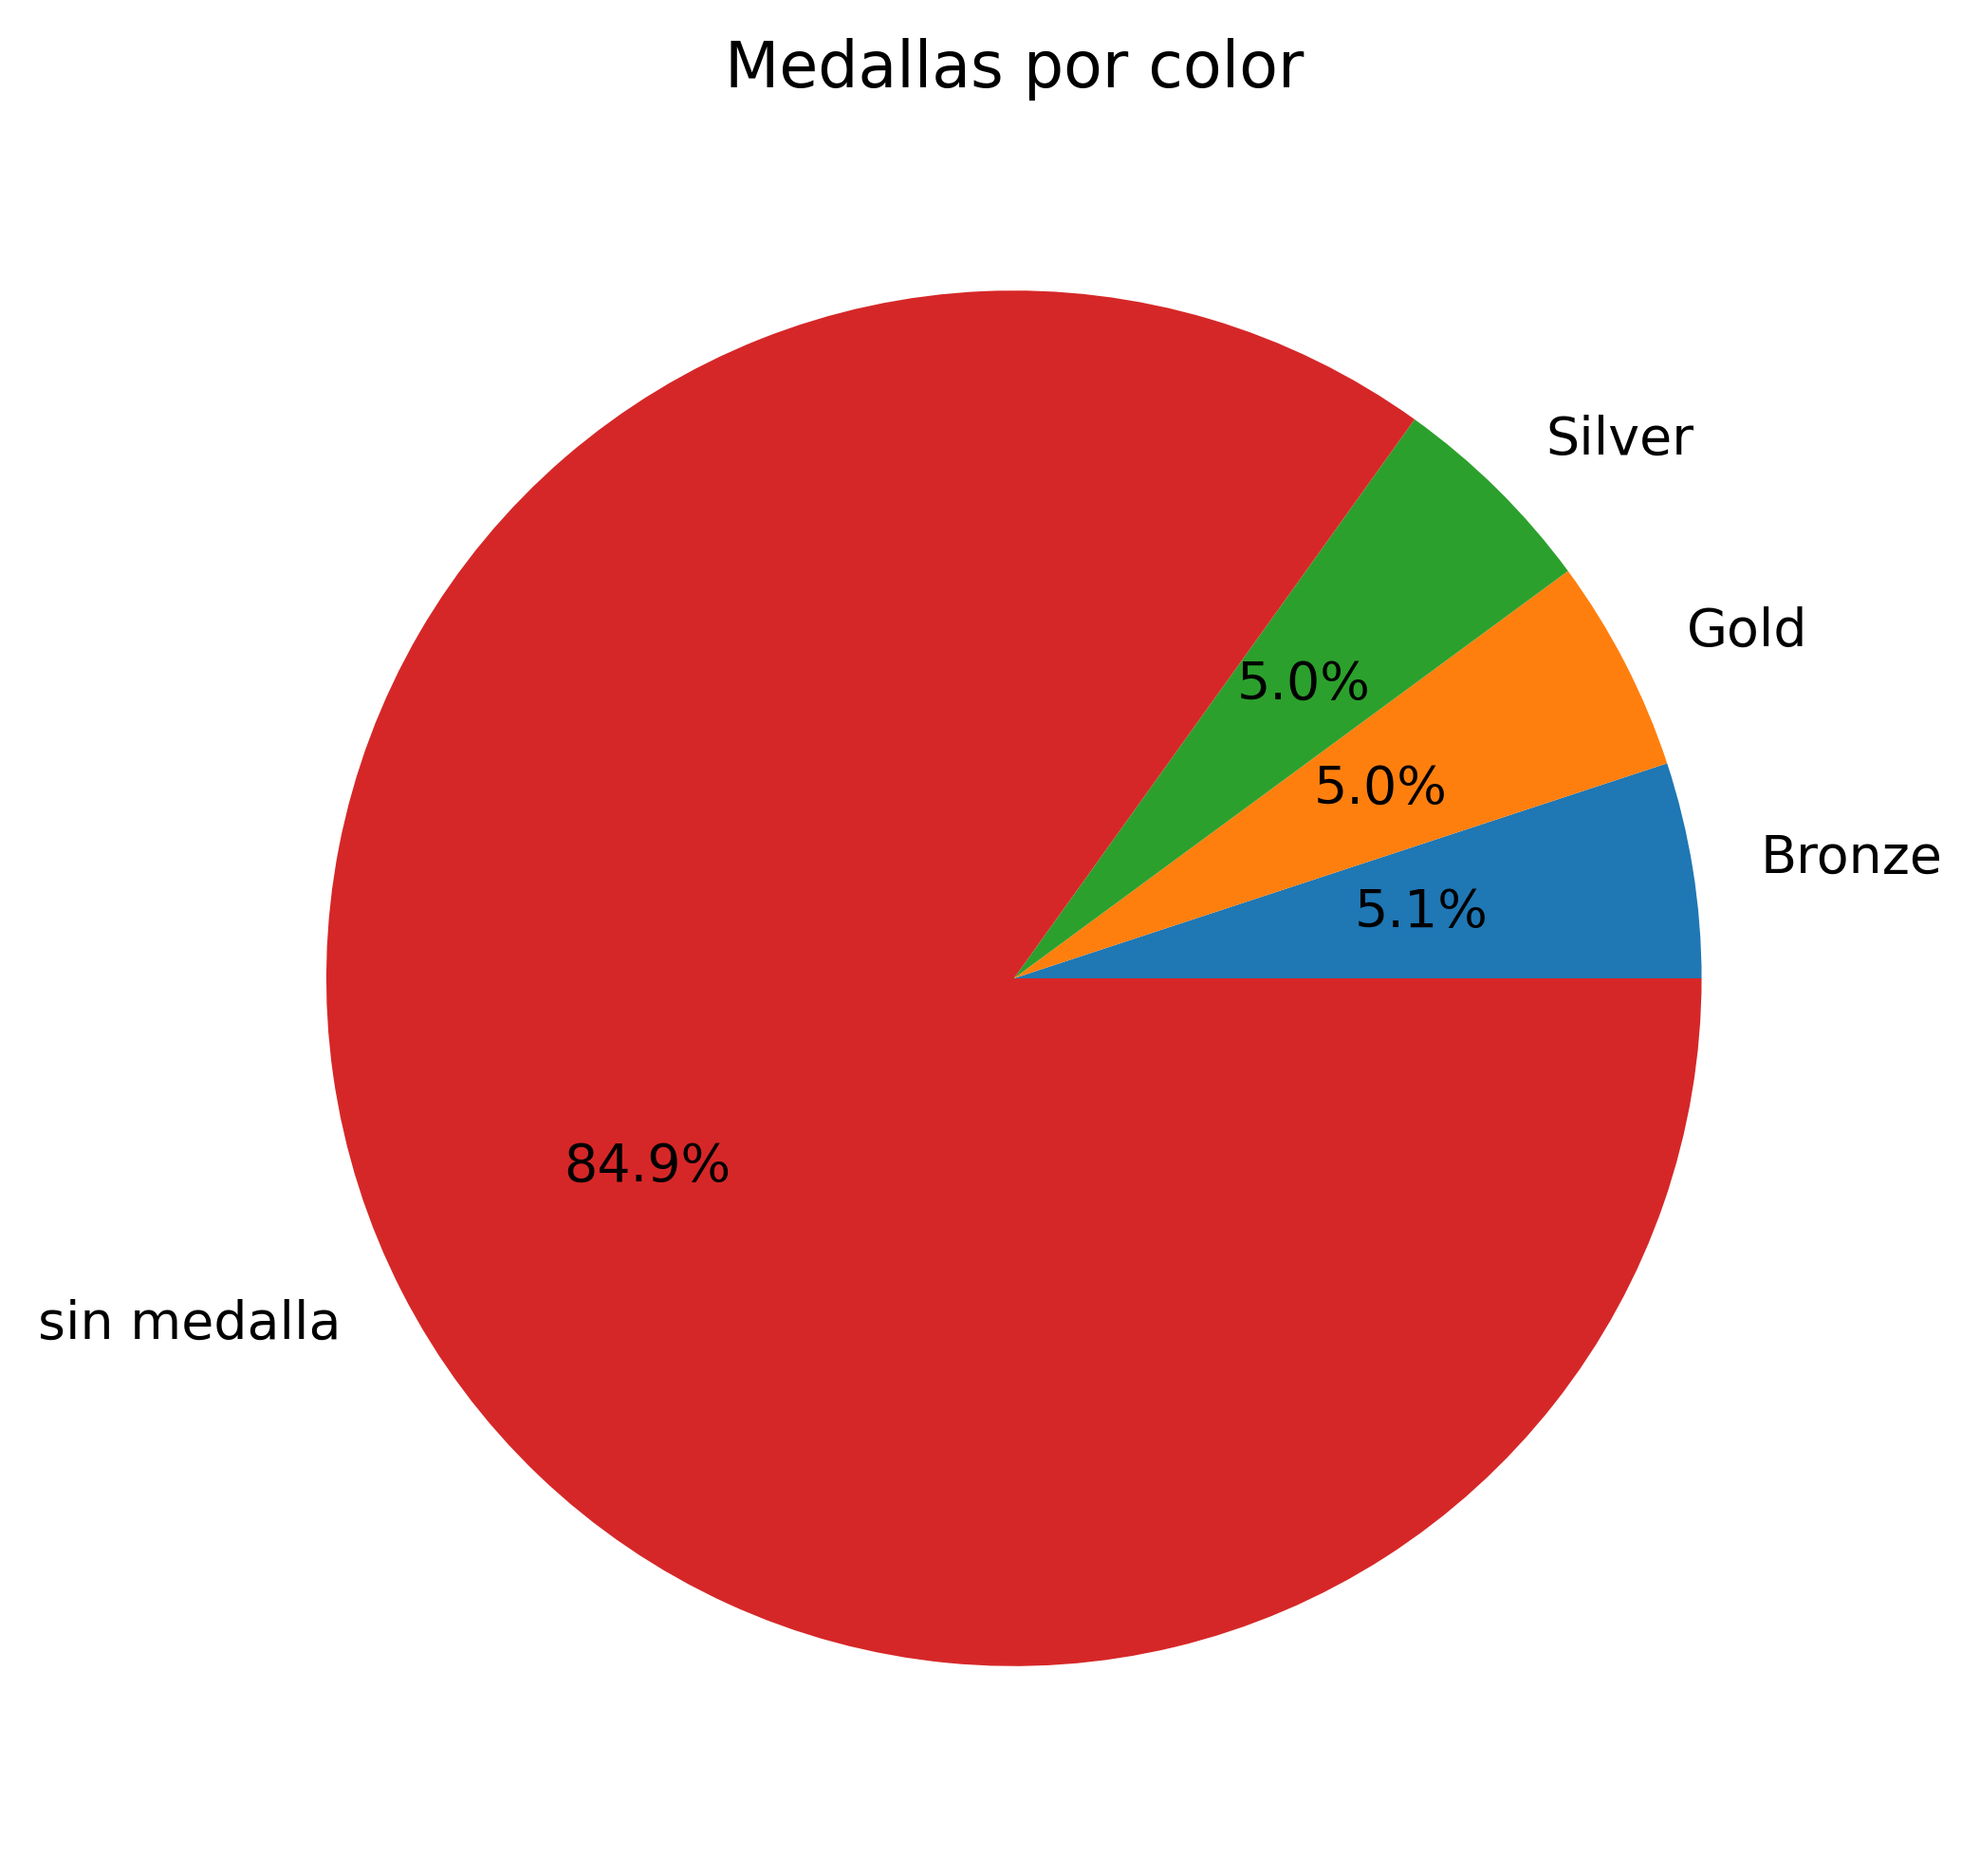

In [323]:
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(Medallas_por_Color.ID, labels = Medallas_por_Color.index,autopct='%1.1f%%')
ax.set_title('Medallas por color')

Se visulaiza que hay un **desbalance en los datos**.

**Insight 1:** Sólo el 15% de las atletas obtendrá una medalla, y con 5% de posibilidad de obtención por color. 

Segmentamos el Dataframe df_M por color de Medalla para visualizar el comportamiento de la variable "Medal" en función de otras características

In [324]:
df_M_Oro=df_M[df_M.Medal == "Gold" ] # dataframe para atletas Mujeres con medallas de oro
df_M_Plata=df_M[df_M.Medal == "Silver" ] # dataframe para atletas Mujeres con medallas de plata
df_M_Bronce=df_M[df_M.Medal == "Bronze" ] # dataframe para atletas Mujeres con medallas de bronce
df_M_Sin_M=df_M[df_M.Medal == "sin medalla" ] # dataframe para atletas Mujeres sin medallas

**2- Análisis de la Edad de las Atletas**

Distribución de las medallas según la edad de las ateltas

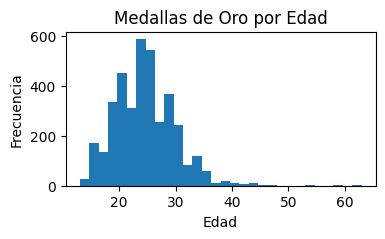

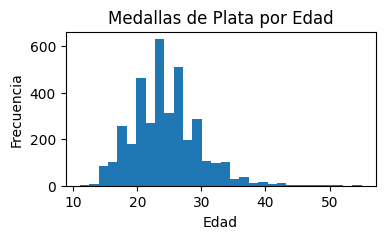

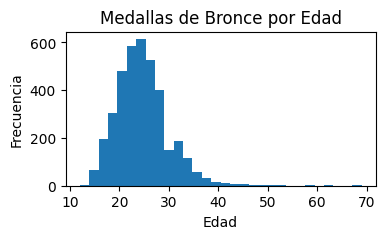

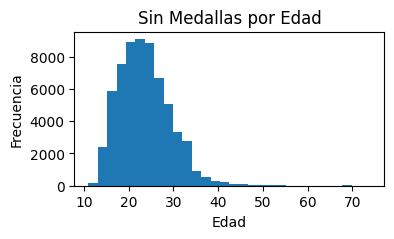

In [326]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Edad')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Edad')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Edad')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Edad')
plt.show()

Oro









In [327]:
df_M_Oro.Age.describe()

count    3747.000000
mean       24.372084
std         5.219538
min        13.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        63.000000
Name: Age, dtype: float64

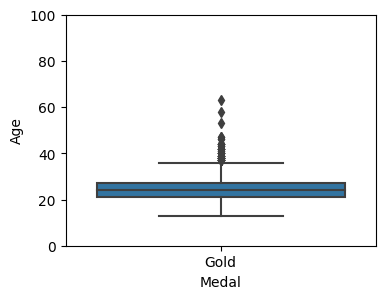

In [328]:
#para ver estadísticos y valores atípicos en la edad
var = 'Age'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

Plata

In [329]:
df_M_Plata.Age.describe()

count    3735.000000
mean       24.443748
std         5.252998
min        11.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        55.000000
Name: Age, dtype: float64

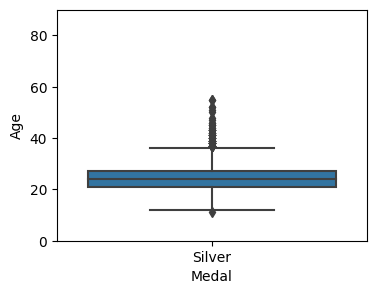

In [330]:
#para ver estadísticos y valores atípicos en la edad
var = 'Age'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

Bronce

In [331]:
df_M_Bronce.Age.describe()

count    3771.000000
mean       24.706673
std         5.329274
min        12.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        69.000000
Name: Age, dtype: float64

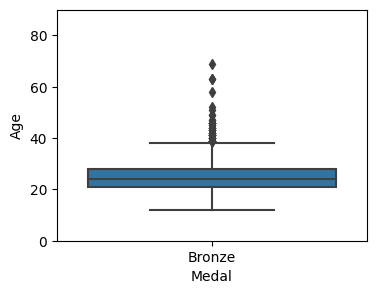

In [332]:
#para ver estadísticos y valores atípicos en la edad
var = 'Age'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

Sin Medalla

In [333]:
df_M_Sin_M.Age.describe()

count    63269.000000
mean        23.595019
std          5.854045
min         11.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

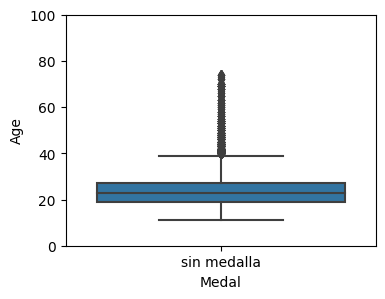

In [334]:
#para ver estadísticos y valores atípicos en la edad
var = 'Age'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**Insight 2**: El promedio de edad de consecución de una medalla (de cualquier color) es 24 años.

**Insight 3:** El promedio de edad de las atletas que no consiguen medallas en 23 años. 

**Insight 4:**  Hasta los 27 años se acumula el 75% de altletas que obtienen medallas de oro.

**Insight 5:** Hasta los 27 años se acumula el 75% de altletas que obtienen medallas de plata.

**Insight 6:**  Hasta los 28 años se acumula el 75% de altletas que obtienen medallas de bronce.

**Insight 7:** Hasta los 27 años se acumula el 75% de altletas que no obtienen medallas.

**2- Análisis de la Altura de las Atletas**

Distribución de las medallas según la altura de las atletas

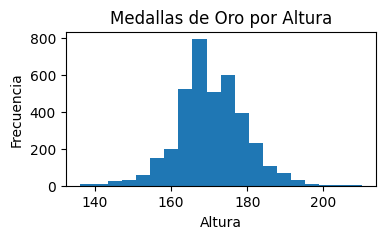

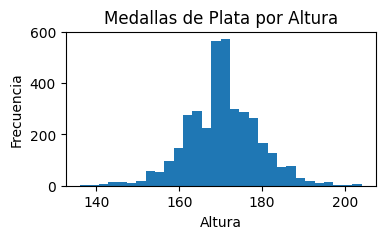

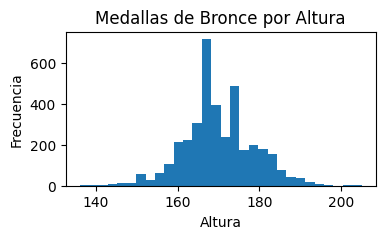

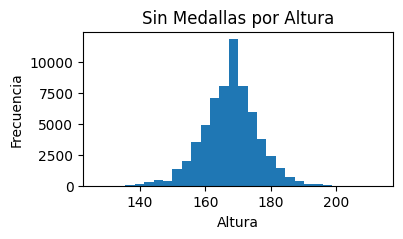

In [335]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Height, bins=20, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Altura')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Altura')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Altura')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Altura')
plt.show()

Oro

In [336]:
df_M_Oro.Height.describe()

count    3747.000000
mean      170.499635
std         8.847278
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       210.000000
Name: Height, dtype: float64

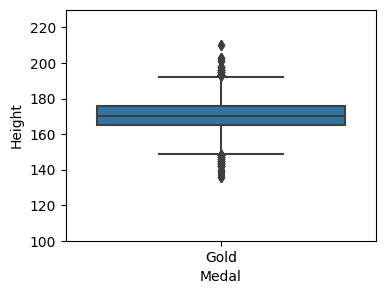

In [337]:
#para ver estadísticos y valores atípicos en la edad
var = 'Height'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

Plata

In [338]:
df_M_Plata.Height.describe()

count    3735.000000
mean      170.313877
std         8.643220
min       136.000000
25%       165.000000
50%       170.000000
75%       175.000000
max       204.000000
Name: Height, dtype: float64

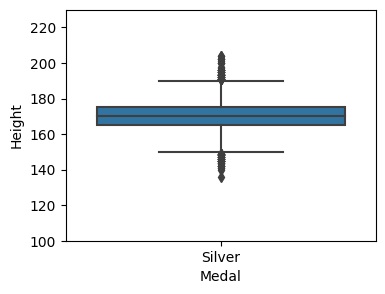

In [339]:
#para ver estadísticos y valores atípicos en la edad
var = 'Height'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

Bronce

In [340]:
df_M_Bronce.Height.describe()

count    3771.000000
mean      170.067975
std         8.596217
min       136.000000
25%       165.000000
50%       170.000000
75%       175.000000
max       205.000000
Name: Height, dtype: float64

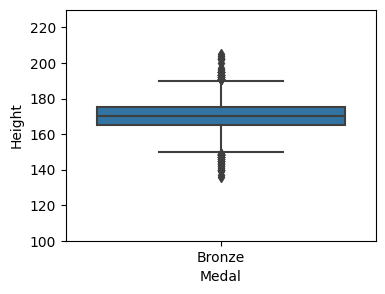

In [341]:
#para ver estadísticos y valores atípicos en la edad
var = 'Height'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

Sin Medalla

In [342]:
df_M_Sin_M.Height.describe()

count    63269.000000
mean       167.403346
std          8.206945
min        127.000000
25%        163.000000
50%        167.839740
75%        172.000000
max        213.000000
Name: Height, dtype: float64

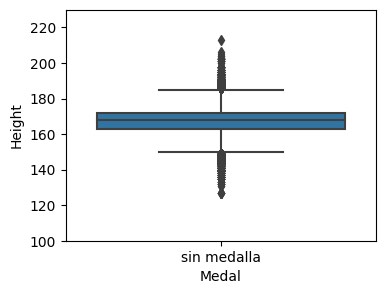

In [343]:
#para ver estadísticos y valores atípicos en la edad
var = 'Height'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**Insight 7:** La altura promedio de las atletas que obtienen algún tipo de medalla es 170 cm.

**Insight 8:** La altura promedio de las atletas que no obtienen medallas es de 167 cm. 

**Insight 9:** La altura mínima de las atletas que obtuvieron medallas es de 136 cm.

**Insight 10:** La altura mínima de las atletas que no obtuvieron medallas es de 127 cm. 

**Insight 11:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de oro. 

**Insight 12:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de plata.

**Insight 13:** Hasta los 175 cm de altura se acumula el 75% de las altletas que obtienen medalla de bronce.

**Insight 14:** Hasta los 172 cm de altura se acumula el 75% de las altletas que no obtienen medallas.

**3- Análisis del Peso de las Atletas**



Distribución de las medallas según el peso de las atletas

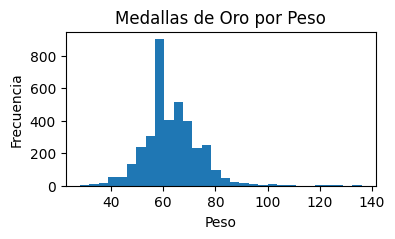

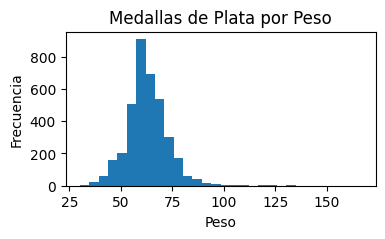

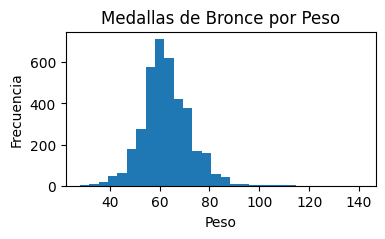

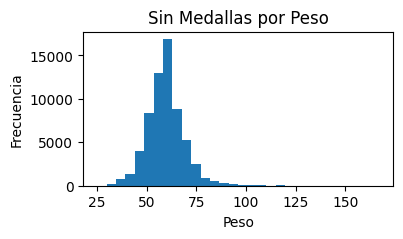

In [344]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Peso')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Peso')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Peso')

mpl.style.use('default')
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Peso')
plt.show()

Oro

In [345]:
df_M_Oro.Weight.describe()

count    3747.000000
mean       63.178700
std        10.592283
min        28.000000
25%        57.000000
50%        62.000000
75%        69.000000
max       136.000000
Name: Weight, dtype: float64

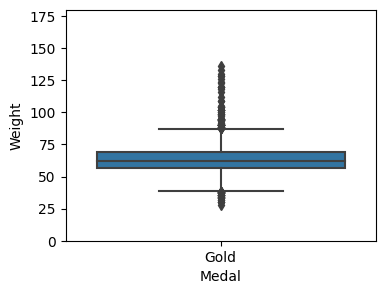

In [346]:
#para ver estadísticos y valores atípicos en la edad
var = 'Weight'
data = pd.concat([df_M_Oro['Medal'], df_M_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

Plata

In [347]:
df_M_Plata.Weight.describe()

count    3735.000000
mean       62.918016
std        10.259378
min        30.000000
25%        57.000000
50%        61.000000
75%        68.000000
max       167.000000
Name: Weight, dtype: float64

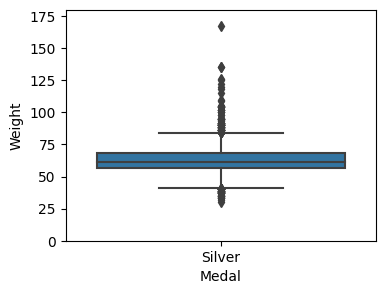

In [348]:
#para ver estadísticos y valores atípicos en la edad
var = 'Weight'
data = pd.concat([df_M_Plata['Medal'], df_M_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

Bronce

In [349]:
df_M_Bronce.Weight.describe()

count    3771.000000
mean       62.794158
std         9.981382
min        28.000000
25%        57.000000
50%        62.000000
75%        68.000000
max       141.000000
Name: Weight, dtype: float64

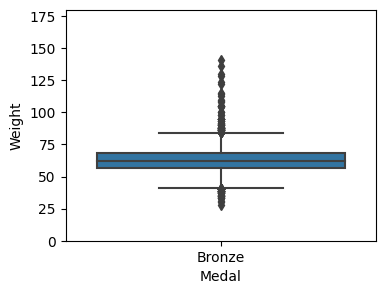

In [350]:
#para ver estadísticos y valores atípicos en la edad
var = 'Weight'
data = pd.concat([df_M_Bronce['Medal'], df_M_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

Sin Medalla

In [351]:
df_M_Sin_M.Weight.describe()

count    63269.000000
mean        59.497978
std          9.457969
min         25.000000
25%         54.000000
50%         60.000000
75%         64.000000
max        167.000000
Name: Weight, dtype: float64

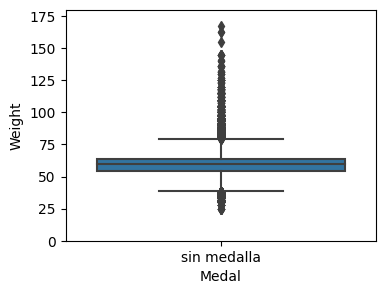

In [352]:
#para ver estadísticos y valores atípicos en la edad
var = 'Weight'
data = pd.concat([df_M_Sin_M['Medal'], df_M_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**Insight 15:** El peso promedio de las atletas que obtienen una medalla de oro es 63 kilos.

**Insight 16:** El peso promedio de las atletas que obtienen una medalla de plata o de bronce es 62 kilos. 

**Insight 17:** El peso promedio de las atletas que no obtienen medalla es 59 kilos. 

**Insight 18:** Entre los 68 y 69 kilos de peso se acumula el 75% de las altletas que obtienen algún tipo de medalla. 

**Insight 19:** Hasta los 64 kilos de peso se acumula el 75% de las altletas que no obtienen ningún tipo de medalla.

**FEATURE SELECTION**

In [353]:
df_M

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Summer,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [354]:
df_M.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

1) Codificación de la variable destino "Medal"

In [372]:
from sklearn.preprocessing import OrdinalEncoder
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["sin medalla", "Bronze", 
                                      "Silver", "Gold"]])

In [370]:
encoder.fit(df_M[["Medal"]])
df_M["Medal_Code"] = encoder.transform(df_M[["Medal"]])

In [371]:
df_M

,ID,Name,Sex,Age,Height,...,City,Sport,Event,Medal,Medal_Code
4,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Calgary,Speed Skating,Speed Skating Women's 500 metres,sin medalla,0.0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,...,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla,0.0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Albertville,Speed Skating,Speed Skating Women's 500 metres,sin medalla,0.0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,...,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",sin medalla,0.0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,...,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,sin medalla,0.0
...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,...,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1.0
271099,135560,Stavroula Zygouri,F,36.0,171.0,...,Athina,Wrestling,"Wrestling Women's Middleweight, Freestyle",sin medalla,0.0
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,...,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,1.0
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,...,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,2.0


2) Eliminación de las columnas que no nos interesan dado que son Metadatos

Se eliminan las siguientes columnas por ser consideradas Metadatos que no afectan la consecución de medallas por parte de una atleta.

**ID:** No es un dato propio de la performance.

**Name:** No es un dato característico de la performance.

**Sex:** No es dato característico de la performance dado que en este estudio se analiza la obtención de medallas por atletas mujeres.

**Team:** El país no se toma como determinante de la performance. 

**Games:** La ciudad y año del evento no es determinante de la performance para el conjunto. Podría ser para una atleta específico pero no es el motivo de este análisis.

**NOC:** Este dato se sacó ahora para simplificar pero la idea es analizarlo, dado que la performance de un atleta puede estar relacionada con el NOC que representa.

**Year:** El año no es característico de la performance de una atleta.

**Season:** La temporada (Inviero - Verano) no es característica de la performance de una atleta.

**Sport:** El deporte no es característica de la performance dado que todos los deportes recibirán medallas.

**Event:** La disciplina no es característica de la performance dado que todas las disciplinas recibirán medallas.

**Medal:** Se ha reemplazado por la columna "Medal_Code".


3) Creación del nuevo dataframe df_M_1

In [373]:
df_M_1=df_M.drop(['ID','Name', 'Sex', 'Team', 'Games', 'NOC',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'], axis=1)

In [359]:
df_M_1

,Age,Height,Weight,Medal_Code
4,21.0,185.0,82.0,0.0
5,21.0,185.0,82.0,0.0
6,25.0,185.0,82.0,0.0
7,25.0,185.0,82.0,0.0
8,27.0,185.0,82.0,0.0
...,...,...,...,...
271080,33.0,168.0,80.0,1.0
271099,36.0,171.0,63.0,0.0
271102,19.0,171.0,64.0,1.0
271103,23.0,171.0,64.0,2.0


4) Definición de X e y

In [361]:
X = df_M_1.drop("Medal_Code", 1)       # Matrtiz de características
y = df_M_1['Medal_Code']               # Caracerística objetivo
df_M_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Age,Height,Weight,Medal_Code
4,21.0,185.0,82.0,0.0
5,21.0,185.0,82.0,0.0
6,25.0,185.0,82.0,0.0
7,25.0,185.0,82.0,0.0
8,27.0,185.0,82.0,0.0


In [362]:
X # visualizamos la matriz de caracteríticas

,Age,Height,Weight
4,21.0,185.0,82.0
5,21.0,185.0,82.0
6,25.0,185.0,82.0
7,25.0,185.0,82.0
8,27.0,185.0,82.0
...,...,...,...
271080,33.0,168.0,80.0
271099,36.0,171.0,63.0
271102,19.0,171.0,64.0
271103,23.0,171.0,64.0


In [363]:
y # visualizamos la caracterítica objetivo

4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
         ... 
271080    1.0
271099    0.0
271102    1.0
271103    2.0
271110    0.0
Name: Medal_Code, Length: 74522, dtype: float64

5) Selección

In [365]:
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [374]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



['Weight', 'Height', 'Age']

Las funciones en el conjunto de datos que más contribuyen a la variable objetivo son:  **'Weight', 'Height' y 'Age'.**